# Health Systems Vulnerability in Haiti Score


## Objective
Develop a score to assess the health system capacity of each local in Haiti to respond public health disasters. This standardized vulnerability score measures access to health services by department and can be used to identify underserved areas. The purpose of this score is to identify areas that are vulnerable relatively in Haiti, acknowledging that overall weaknesses of Haiti's Health System in comparison to others in the region.


## Hypothesis or Research Question?
Which areas in Haiti are most vulnerable due to a national public health threat such as COVID-19?
 
 
### Project Plan

- Conduct research on health systems capacity analysis.
- Collect health facility data across Haiti to measure health system capacity
- Develop a conceptual model for evaluating health system capacity by using relevant research
- Create a ranked model based on the different capacity areas
    - uniform weights
    - subjective weights
    - propensity score
 - Evaluation of score to match health outcomes data by region, do the areas that we identify as being the most vulnerable in terms of health system capacity also have the worst health outcomes?
 
 
 
 
## Data Source
We use data from the 2017-2018 Service Provision Assessment (SPA) survey in Haiti, a nationally representative survey of health facilities implemented by the Institut Haïtien de l’Enfance (IHE) through the Demographic and Health Surveys (DHS) Program. Our analysis of SPA data is a starting point for a broader conversation on public health infrastructure in Haiti, and we welcome your feedback about updated data sources.

## Data Cleaning
In this step you will prepare your data for analysis.




### Review data types
Inspect the dataset for the data types of each column.

### Analytical Transformations
Perform any transformation on the columns in the dataset to enable further analysis.

- I need to create a dataset that is structured to be one record per department
- I will need to normalize or standardize the indicators we are using for ranking

### Treatment of Missing Values
If there are any missing values, how do you plan to treat those data columns?

- My dataset is aggregated at the department and the variables have been pre-selected for their richness of reporting across all departments.

## Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

### Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

- I will use a boxplot analysis of the relative score to identify which areas are the most vulnerable compared to the odter

## Reflections
### Summary of Data Analysis
- What insights should the user takeaway from EDA.

### Questions unanswered
- What aspects of the research question were we unable to answer and why?

### Recommendations
- What should the reader do next with this information?

### Next Steps
- What will the analyst do next based on the analysis?

In [1]:
import pandas as pd
import numpy as np

In [7]:
# save the url of the file on the notebook
url1 = "datasets/spa_dataset/HTFC7ASDSP/HTFC7AFLSP.SAS7BDAT"
#label columns named convention
url2 = "datasets/spa_mapping_columns1.csv"
#read the data 
spa_df = df = pd.read_sas(url1,encoding='latin1')
# read the mapping index variable dataset
df_var_name = pd.read_csv(url2 )


# save the dataset as csv file and read it after
#spa_df =pd.read_csv('datasets/spa.csv',encoding='latin1')

# top 5 rows on the dataset
#spa_df.drop(columns =['Unnamed: 0'],inplace =True)
# This column doesn't exist for me

spa_df.head()

,FACIL,REC_TYPE,DEPART,DEPARTN,VILCOM,VILCOMN,LOCALITY,FACTYPE,MGA,FTYPE,...,Q3180,Q3181,Q3182,Q3183,Q3184,Q3185,Q3200,Q3201,Q3201A,Q3201B
0,1.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,7.0,3.0,1.0,...,1.0,1.0,5.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN
1,2.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,3.0,1.0,1.0,...,4.0,2.0,5.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN
2,3.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,6.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN
3,4.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,5.0,3.0,1.0,...,2.0,1.0,4.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN
4,5.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,6.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0


In [9]:
# dataset info 
spa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Columns: 1871 entries, FACIL to Q3201B
dtypes: float64(1848), object(23)
memory usage: 14.7+ MB


In [11]:
# retrieve all columns need
colums = list(set(spa_df.columns))

df_var_name.head()

,GLOBAL_VAR_NAME,VAR_NAME,SAS_VAR_NAME,RANK,CATEGORY,CAT_ID,Filter,Grouped_Master
0,Number of facitilies,Facility identification,FACIL,Top-Tier,Capacity,1,0,1.0
1,"Number of generalists, full-time",MEDECINS GENERALISTES,Q400A_01,Top-Tier,Capacity,1,0,1.0
2,"Number of lab technicians, full-time",TECHNICIEN DE LABORATOIRE,Q400A_03,Top-Tier,Capacity,1,0,1.0
3,"Number of lab assistants, full-time",AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),Q400A_04,Top-Tier,Capacity,1,0,1.0
4,"Number of nurses, full-time",INFERMIER,Q400A_08,Top-Tier,Capacity,1,0,1.0


In [14]:
# remove duplicates if possible
columns_need = list(set(df_var_name.SAS_VAR_NAME))

# selects colunms expected
colunms_selected = [x for x in colums if x in columns_need]

# display the number of columns
print("Number of cols: ",len(columns_need))

col24 =list(df_var_name.SAS_VAR_NAME)

# display the number of columns selected
print( len(colunms_selected))

# show the difference
print("show the difference: ",set(columns_need) -set(colunms_selected))

40

In [19]:
# build the mapping rename columns 
map_dict = {'Q1314B_01': 'Q1314B_1',
            'Q1314B_02': 'Q1314B_2',
            'Q450 - Q453': 'Q453',
            'Q710_03  ': 'Q710_03',
            'Q881B_01': 'Q881B_1',
            'Q881B_01':'Q881B_1',
            'Q881B_02':'Q881B_2',
            'Q831B_01': 'Q831B_1',
            '400A_01': 'Q400A_01',
             '400A_02': 'Q400A_02',
             '400A_03':  'Q400A_03',
             '400A_04': 'Q400A_04',
             '400A_08':  'Q400A_08',
             '400A_09':  'Q400A_09',
             'Q1314B_01': 'Q1314B_1',
            'Q1314B_02': 'Q1314B_2',
             'Q1314B_03': 'Q1314B_3',
            'Q881B_01': 'Q881B_1',
            'Q881B_02': 'Q881B_2',
            'Q1421B_03':'Q1421B_3',
            'Q1421B_05': 'Q1421B_5',
            'Q1314B_03': 'Q1314B_3',
            
                        
           
           }



# renames columns
df_var_name.SAS_VAR_NAME =df_var_name.SAS_VAR_NAME.replace(map_dict)
df_var_name.head()

,GLOBAL_VAR_NAME,VAR_NAME,SAS_VAR_NAME,RANK,CATEGORY,CAT_ID,Filter,Grouped_Master
0,Number of facitilies,Facility identification,FACIL,Top-Tier,Capacity,1,0,1.0
1,"Number of generalists, full-time",MEDECINS GENERALISTES,Q400A_01,Top-Tier,Capacity,1,0,1.0
2,"Number of lab technicians, full-time",TECHNICIEN DE LABORATOIRE,Q400A_03,Top-Tier,Capacity,1,0,1.0
3,"Number of lab assistants, full-time",AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),Q400A_04,Top-Tier,Capacity,1,0,1.0
4,"Number of nurses, full-time",INFERMIER,Q400A_08,Top-Tier,Capacity,1,0,1.0


In [20]:
var_col_filter = list(df_var_name[df_var_name.Filter == 1.0].SAS_VAR_NAME.values)
# var_col_filter

# display the differences
columns_need = list(set(df_var_name.SAS_VAR_NAME))
colunms_selected = [x for x in colums if x in columns_need]
# set(columns_need) -set(colunms_selected) # The set should be empty

# selects columns needed before computation
spa_df_final = spa_df[['DEPARTN','VILCOMN']+sorted(colunms_selected+['Q1322'])] 

# convert columns to index
cols =  list(set(spa_df_final.columns))


# displays the cardinality of each column to understand values
my_dict =dict(var_name =[],sas_var_name =[] ,values_range=[])
for col in sorted(cols):
    val = df_var_name[df_var_name.SAS_VAR_NAME ==col]
    if(len(val) >0):
        my_dict['var_name'].append(val['VAR_NAME'].values[0])
        my_dict['sas_var_name'].append(col)
        my_dict['values_range'].append(sorted(spa_df_final[col].unique()))
        
        
df_review = pd.DataFrame(my_dict)
df_review['Aggfuc'] = np.nan



# saves the datset for review
df_review.to_csv('review1.csv')


['Q710_03',
 'Q710_08',
 'Q710_01',
 'Q710_02',
 'Q700B_06',
 'Q1210B_03',
 'Q1622B_09',
 'Q1622B_10',
 'Q2331B_06',
 'Q1622B_12',
 'Q700B_07',
 'Q1210B_04',
 'Q1314B_3',
 'Q1421B_3',
 'Q1421B_5',
 'Q1622B_12',
 'Q1622B_14',
 'Q2331B_07',
 'Q881B_1',
 'Q881B_2',
 'Q880',
 'Q700B_17',
 'Q700B_18',
 'Q700B_19',
 'Q450',
 'Q451',
 'Q453',
 'Q452']

# Create metrics from survey response variables

In [28]:
# selectd yes/no columns
yes_no_col = [ 'Q110',
'Q1210B_03',
'Q1210B_04',
'Q1421B_3',
'Q1421B_5',
'Q1622B_09',
'Q1622B_10',
'Q1622B_12',
'Q1622B_14',
'Q2331B_06',
'Q2331B_07',
'Q340',
'Q451',
'Q700B_06',
'Q700B_07',
'Q700B_17',
'Q700B_19',
'Q880',
]
yes_no_col1 = [col for col in yes_no_col if col not in var_col_filter ]
#set(yes_no_col)- set(yes_no_col1)


# selects numerical columns
col_num = ['Q112',
'Q400AT',
'Q400A_01',
'Q400A_03',
'Q400A_04',
'Q400A_08',
'Q400A_12',


]
col_num1=[col for col in col_num if col not in var_col_filter ]
#set(col_num) - set(col_num1)

# selects 1/2/3 answers columns
col_1_2_3 =['Q1314B_3',
'Q331',
'Q450',
'Q452',
'Q453',
'Q700B_18',
'Q710_01',
'Q710_02',
'Q710_03',
'Q710_07',
'Q710_08',
'Q710_10',
'Q881B_1',
'Q881B_2',

]

col_1_2_3_=[col for col in col_1_2_3 if col not in var_col_filter ]
#set(col_1_2_3) - set(col_1_2_3_)

## Oxygen-filled oxygen cylinders
oxygen = """
Q700B_17
Q700B_18
Q700B_19
"""


## Referral capacity-functional ambulance at facility*
ambulance_referral = """
Q450
Q451
Q452
Q453
"""

## Soap and running water or else alcohol-based hand disinfectant
soap = """
Q710_03  
Q710_08
Q710_01
Q710_02 
"""

stethoscope = """
Q1622B_12
Q700B_07
Q1210B_04
Q1314B_3
Q1421B_3
Q1421B_5
Q1622B_14
Q2331B_07
"""

thermometer = """
Q700B_06
Q1210B_03
Q1622B_09
Q1622B_10
Q2331B_06
"""

xray_machine = """
Q881B_1
Q881B_2
Q880
"""

variables_lists = [
    oxygen,
    ambulance_referral,
    soap,stethoscope,
    thermometer,
    xray_machine]

def make_spa_variable( dataset, variable_file, index_cols = ['DEPARTN','VILCOMN'], criteria = [1],debug=False):
    """
    This function will read in the SPA `dataset`.
    Create aggregated calculations by summarizing the individual responses to variables identified in the `variable_file`.
    Append the results of the function to the `map_dict` object
    
    dataset: pd.DataFrame instance, SPA dataset
    map_dict: dictionary, a dictionary object with keys: "SAS_VAR_NAME","departn","VILCOMN","values"
    variable_file: string, a set of codes/column names to be found in the dataset.
    
    """
    # Read in variables as string file, with codes separated by spaces
    if type(variable_file) == str:
        variable_cols = variable_file.split()
    else:
        variable_cols = variable_file
    identifier_col = variable_cols[0]
    
    
    missing_cols = []
    # Check if col is in the dataset
    for col in variable_cols:
        if not col in dataset.columns:
            missing_cols.append(col)
    print("These columns were not found in the Datset and will not be included: ",missing_cols)
    # Subset the dataframe to index columns and those parsed from variable file    
    select_df = dataset[['FACIL']+index_cols+variable_cols].copy()
    # Sum the columns from the variable file with a positive value
    
    variable_cols_sum = (select_df[variable_cols].isin(criteria) ).sum(1)
    # If any one of the rows has a value set row equal to 1 else 0 
    select_df[identifier_col] = np.where( variable_cols_sum > 0 , 1, 0)
    
    # If any one of the rows has a value set row equal to 1 else 0 
    #select_df[identifier_col] = np.where( variable_cols_sum >1 , 1, 0)
    # Aggregate the columns
    variable_df = select_df.groupby(['DEPARTN','VILCOMN'])[identifier_col].sum()
    return variable_df

{'Q1210B_03',
 'Q1210B_04',
 'Q1421B_3',
 'Q1421B_5',
 'Q1622B_09',
 'Q1622B_10',
 'Q1622B_12',
 'Q1622B_14',
 'Q2331B_06',
 'Q2331B_07',
 'Q451',
 'Q700B_06',
 'Q700B_07',
 'Q700B_17',
 'Q700B_19',
 'Q880'}

In [160]:
variable_calculations = []

temp_df = spa_df_final.groupby(['DEPARTN',"VILCOMN"]).agg({"FACIL":'count'})
variable_calculations.append(temp_df)

for item in col_1_2_3_:
    val = make_spa_variable(spa_df_final,[item],criteria = [1,2,3],debug=True)
    variable_calculations.append(val)

for item in yes_no_col1:
    val = make_spa_variable(spa_df_final,[item])
    variable_calculations.append(val)

for item in col_num1:
    val = spa_df_final.groupby(['DEPARTN',"VILCOMN"]).agg({item:'sum'})
    variable_calculations.append(val)

  

  
for item in variables_lists:
    val = make_spa_variable(spa_df_final,item)
    variable_calculations.append(val)
    
    
df = pd.concat(variable_calculations,axis = 1)

variable_code_cols = df.columns.values.tolist()
df.reset_index(inplace=True)

df_melt = df.melt(id_vars = ['DEPARTN','VILCOMN'],value_vars=variable_code_cols)
df_melt.rename(columns={'variable':'SAS_VAR_NAME'},inplace=True)
#df_melt.head()

df_named = pd.merge(df_var_name,df_melt,how='inner',on ='SAS_VAR_NAME')
df_named = df_named[df_named['Grouped_Master'] == 1]


df2 = pd.pivot_table(df_named,index =['CATEGORY','GLOBAL_VAR_NAME' ,'VAR_NAME'],columns=['DEPARTN','VILCOMN'],values ='value', aggfunc = np.sum,fill_value =0)
#df2

These columns were not found in the Datset and will not be included:  []
These columns were not found in the Datset and will not be included:  []
These columns were not found in the Datset and will not be included:  []
These columns were not found in the Datset and will not be included:  []
These columns were not found in the Datset and will not be included:  []
These columns were not found in the Datset and will not be included:  []
These columns were not found in the Datset and will not be included:  []
These columns were not found in the Datset and will not be included:  []
These columns were not found in the Datset and will not be included:  []
These columns were not found in the Datset and will not be included:  []
These columns were not found in the Datset and will not be included:  []


,DEPARTN,VILCOMN,SAS_VAR_NAME,value
0,Artibonite,Anse-Rouge,FACIL,7.0
1,Artibonite,Desdunes,FACIL,3.0
2,Artibonite,Dessalines,FACIL,21.0
3,Artibonite,Ennery,FACIL,7.0
4,Artibonite,Gona!ves,FACIL,16.0


#### Create Department dataset

In [164]:
agg_df = df_named.groupby(['DEPARTN','VAR_NAME']).agg({'value':'sum'}).reset_index()
deptn_data = agg_df.pivot(index ='DEPARTN',columns="VAR_NAME",values='value').reset_index()
deptn_data.columns.name = None
deptn_data.to_csv("outputs/deptn_data.csv",index=False)
#deptn_data.to_csv("outputs/haiti_department_health_capacity.csv",index=False)
deptn_data

,DEPARTN,AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),Alcohol based hand rub,Clean/sterile latex gloves,Equipment available:Digital X-ray not requiring film,Facility connected to central supply electricity,Facility identification,Functional ambulance at facility,General OPD area: Thermometer available and functioning,INFERMIER,MEDECINS GENERALISTES,Medical masks,Number of overnight/in-patient beds,Other equip:Stethoscope,Oxygen concentrators available and functioning,PHARMACIEN,Routine in-patient care or Overnight observation,TECHNICIEN DE LABORATOIRE,TOTAL FULL-TIME STAFF,Water onsite/within 500 meters
0,Artibonite,23.0,113.0,121.0,11.0,23.0,124.0,33.0,112.0,395.0,102.0,121.0,866.0,120.0,13.0,14.0,24.0,125.0,2188.0,92.0
1,Centre,16.0,44.0,53.0,8.0,25.0,55.0,23.0,51.0,141.0,79.0,53.0,678.0,52.0,11.0,15.0,13.0,81.0,1087.0,30.0
2,Grand'Anse,1.0,50.0,53.0,5.0,8.0,53.0,18.0,48.0,159.0,37.0,53.0,265.0,50.0,6.0,2.0,9.0,48.0,729.0,45.0
3,Nippes,5.0,33.0,34.0,5.0,5.0,35.0,11.0,34.0,82.0,48.0,34.0,149.0,34.0,6.0,5.0,9.0,41.0,423.0,17.0
4,Nord,15.0,95.0,107.0,20.0,37.0,108.0,29.0,105.0,575.0,192.0,107.0,933.0,107.0,20.0,23.0,31.0,234.0,2045.0,84.0
5,Nord'Est,3.0,41.0,41.0,4.0,9.0,41.0,20.0,39.0,148.0,59.0,41.0,208.0,40.0,10.0,4.0,7.0,55.0,745.0,29.0
6,Nord'Ouest,7.0,81.0,84.0,4.0,5.0,87.0,23.0,83.0,177.0,43.0,84.0,422.0,84.0,10.0,5.0,18.0,84.0,1051.0,59.0
7,Ouest,65.0,321.0,366.0,67.0,214.0,380.0,109.0,355.0,2150.0,805.0,366.0,3819.0,362.0,80.0,180.0,99.0,908.0,8623.0,206.0
8,Sud,7.0,76.0,79.0,11.0,30.0,80.0,26.0,79.0,418.0,127.0,79.0,704.0,78.0,18.0,15.0,15.0,158.0,1572.0,55.0
9,Sud'est,8.0,65.0,69.0,5.0,14.0,70.0,21.0,65.0,198.0,76.0,69.0,283.0,67.0,14.0,6.0,13.0,48.0,732.0,49.0


#### Create commune dataset

In [165]:
commune_data = pd.pivot_table(df_named, index =['DEPARTN','VILCOMN'],columns="VAR_NAME",values='value').reset_index()
commune_data.columns.name = None
commune_data.to_csv("outputs/commune_data.csv",index=False)
#deptn_data.to_csv("outputs/haiti_department_health_capacity.csv",index=False)
commune_data

,DEPARTN,VILCOMN,AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),Alcohol based hand rub,Clean/sterile latex gloves,Equipment available:Digital X-ray not requiring film,Facility connected to central supply electricity,Facility identification,Functional ambulance at facility,General OPD area: Thermometer available and functioning,...,MEDECINS GENERALISTES,Medical masks,Number of overnight/in-patient beds,Other equip:Stethoscope,Oxygen concentrators available and functioning,PHARMACIEN,Routine in-patient care or Overnight observation,TECHNICIEN DE LABORATOIRE,TOTAL FULL-TIME STAFF,Water onsite/within 500 meters
0,Artibonite,Anse-Rouge,0.0,7.0,7.0,0.0,0.0,7.0,4.0,6.0,...,2.0,7.0,9.0,7.0,0.0,0.0,1.0,1.0,44.0,5.0
1,Artibonite,Desdunes,0.0,3.0,3.0,0.0,1.0,3.0,0.0,2.0,...,2.0,3.0,10.0,3.0,0.0,0.0,1.0,2.0,27.0,2.0
2,Artibonite,Dessalines,0.0,19.0,21.0,1.0,4.0,21.0,3.0,20.0,...,7.0,21.0,37.0,20.0,0.0,0.0,1.0,10.0,212.0,18.0
3,Artibonite,Ennery,0.0,6.0,7.0,0.0,1.0,7.0,2.0,7.0,...,4.0,7.0,19.0,7.0,1.0,1.0,1.0,10.0,103.0,5.0
4,Artibonite,Gona!ves,6.0,14.0,16.0,2.0,7.0,16.0,3.0,14.0,...,28.0,16.0,225.0,16.0,2.0,5.0,4.0,31.0,470.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Sud'est,Grand-Gosier,0.0,3.0,3.0,0.0,0.0,3.0,0.0,3.0,...,1.0,3.0,3.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0
151,Sud'est,Jacmel,1.0,20.0,21.0,3.0,8.0,21.0,5.0,20.0,...,28.0,21.0,130.0,21.0,6.0,2.0,3.0,20.0,302.0,12.0
152,Sud'est,La Vall!e,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,5.0,1.0,14.0,1.0,1.0,0.0,1.0,1.0,20.0,1.0
153,Sud'est,Marigot,2.0,4.0,4.0,0.0,2.0,4.0,3.0,4.0,...,9.0,4.0,16.0,4.0,2.0,0.0,1.0,3.0,55.0,2.0


In [ ]:
%matplotlib inline

### Population data to adjust metrics by relative population

In [170]:
# Load in the population estimates datasets
population_data = pd.read_excel(
    "/Users/morganmendis/Projects/covid19-vulnerability-map/hti_adminboundaries_tabulardata.xlsx",
    sheet_name = "hti_pop2019_adm2")
population_data.head()

,adm0code,adm0_en,adm0_fr,adm0_ht,adm1code,adm1_en,adm1_fr,adm1_ht,adm2code,adm2_en,adm2_fr,adm2_ht,IHSI_UNFPA_2019,IHSI_UNFPA_2019_female,IHSI_UNFPA_2019_male
0,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,HT0111,Port-au-Prince,Port-au-Prince,,1.227540e+06,648353,579188
1,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,HT0112,Delmas,Delmas,,4.914342e+05,258526,232908
2,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,HT0113,Carrefour,Carrefour,,6.357646e+05,333500,302263
3,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,HT0114,Petion-Ville,Pétion-Ville,,4.685251e+05,241407,227118
4,HT,Haiti,Haïti,Ayiti,HT01,West,Ouest,Lwès,HT0115,Kenscoff,Kenscoff,,7.140848e+04,35608,35800


### Standardize the names of the departments and communes
In order to join the population data, we need to stanardize the department and commune data from the SPA dataset to match the population dataset. We create dictionary objects and use the replace method to only replace instances that match a key in the dataframe.

In [200]:
# Create a remapping of the department names
rename_department_mapping = {"Grand'Anse":"Grande'Anse",
                       "Nord'Ouest":"Nord-Ouest",
                       "Nord'Est":"Nord-Est",
                       "Sud'est":"Sud-Est"}

# Create a remapping of the commune names
rename_commune_mapping  = {
    'Anse-Rouge': 'Anse Rouge',
    'Gona!ves': 'Gonaives',
    'Gros-Morne': 'Gros Morne',
    "L'Est!re": "L'Estere",
    "Petite-Rivi!re de l'Artibonite": "Petite Riviere de l'Artibonite",
    'Saint-Michel': "Saint-Michel de l'Attalaye",
    'St Marc': 'Saint-Marc',
    'Terre-Neuve': 'Terre Neuve',
    'Bellad!re': 'Belladere',
    'Boucan-Carr!': 'Boucan Carre',
    'Cerca-Cavajal': 'Cerca Carvajal',
    'Cerca-La-Source': 'Cerca La Source',
    'Ma!ssade': 'Maissade',
    'Mirbalais': 'Mirebalais',
    "Saut-d'Eau": "Saut d'Eau",
    "Anse-d'Hainault": "Anse d'Hainault",
    'Dame-Marie': 'Dame Marie',
    'J!r!mie': 'Jeremie',
    'Anse-!-Veau': 'Anse-a-Veau',
    'Anse A Veau': 'Anse-a-Veau',
    'Barad!res': 'Baraderes',
    'Fonds-des-N!gres': 'Fonds des Negres',
    'Mirago!ne': 'Miragoane',
    'Petit-Trou': 'Petit Trou de Nippes',
    'Petite-Rivi!re de Nippes': 'Petite Riviere de Nippes',
    'Acul-du-Nord': 'Acul du Nord',
    'Bas-Limb!': 'Bas Limbe',
    'Cap-Ha!tien': 'Cap-Haitien',
    'Grande-Rivi!re': 'Grande Riviere Du Nord',
    'Limb!': 'Limbe',
    'Plaine-du-Nord': 'Plaine du Nord',
    'Quartier-Morin': 'Quartier Morin',
    'Saint-Rapha!l': 'Saint-Raphael',
    'Fort-Libert!': 'Fort-Liberte',
    'Mombin-Crochu': 'Mombin Crochu',
    'Mont-Organis!': 'Mont-Organise',
    'Sainte-Suzanne': 'Sainte Suzanne',
    'Terrier-Rouge': 'Terrier Rouge',
    'Trou-du-Nord': 'Trou du Nord',
    'Valli!res': 'Vallieres',
    'Anse-!-Foleur': 'Anse-a-Foleur',
    'Baie-de-Henne': 'Baie de Henne',
    'Bassin-Bleu': 'Bassin Bleu',
    'Chansolme': 'Chamsolme',
    'Jean-Rabel': 'Jean Rabel',
    'M!le-Saint-Nicolas': 'Mole Saint Nicolas',
    'Port-De-Paix': 'Port-de-Paix',
    "St-Ls-du-Nord'Ouest": 'Saint-Louis du Nord',
    'Anse-!-Galets': 'Anse a Galets',
    'Cit!-Soleil': 'Cite Soleil',
    'Cornillon': 'Cornillon / Grand Bois',
    'Cx Des Bouquets': 'Croix-Des-Bouquets',
    'Croix-des-Bouquets': 'Croix-Des-Bouquets',
    'Grand-Go!ve': 'Grand-Goave',
    'L!og!ne': 'Leogane',
    'P!tion-ville': 'Petion-Ville',
    'Petit Goave': 'Petit-Goave',
    'Petit-Go!ve': 'Petit-Goave',
    'Pointe-!-Raquettes': 'Pointe a Raquette',
    'Port-Au-Prince': 'Port-au-Prince',
    "Port-au-Prince":'Port-au-Prince',
    "Port Au Prince":'Port-au-Prince',
    '!le-!-Vache': 'Ile a Vache',
    'C!teaux': 'Coteaux',
    'Cayes': 'Les Cayes',
    'Chardonni!res': 'Chardonnieres',
    'Port-!-Piment': 'Port-a-Piment',
    'Roche-!-Bateau': 'Roche a Bateau',
    'Saint-Jean': 'Saint Jean du Sud',
    'Saint-Louis du Sud': 'Saint louis du Sud',
    'Anse-!-Pitres': 'Anse-a-Pitre',
    'Belle-Anse': 'Belle Anse',
    'C!tes-de-Fer': 'Cotes de Fer',
    'Grand-Gosier': 'Grand Gosier',
    'La Vall!e': 'La Vallee'}


deptn_data['DEPARTN'] = deptn_data['DEPARTN'].replace(rename_department_mapping)
commune_data["DEPARTN"] = commune_data['DEPARTN'].replace(rename_department_mapping)

commune_data["VILCOMN"] = commune_data['VILCOMN'].replace(rename_commune_mapping)


#print(len(commune_data))
#commune_pop = commune_data.merge(population_data,left_on='VILCOMN',right_on="adm2_en",how='left')
#missing_cols = commune_pop.loc[commune_pop.adm2_en.isnull(),['DEPARTN','VILCOMN']]
#print(len(missing_cols))

analytical_dataset = commune_data.merge(population_data[["adm1_fr","adm2_en",'IHSI_UNFPA_2019']],left_on="VILCOMN",right_on="adm2_en",how='left')

analytical_dataset.head()

,DEPARTN,VILCOMN,AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),Alcohol based hand rub,Clean/sterile latex gloves,Equipment available:Digital X-ray not requiring film,Facility connected to central supply electricity,Facility identification,Functional ambulance at facility,General OPD area: Thermometer available and functioning,...,Other equip:Stethoscope,Oxygen concentrators available and functioning,PHARMACIEN,Routine in-patient care or Overnight observation,TECHNICIEN DE LABORATOIRE,TOTAL FULL-TIME STAFF,Water onsite/within 500 meters,adm1_fr,adm2_en,IHSI_UNFPA_2019
0,Artibonite,Anse Rouge,0.0,7.0,7.0,0.0,0.0,7.0,4.0,6.0,...,7.0,0.0,0.0,1.0,1.0,44.0,5.0,Artibonite,Anse Rouge,51424.376909
1,Artibonite,Desdunes,0.0,3.0,3.0,0.0,1.0,3.0,0.0,2.0,...,3.0,0.0,0.0,1.0,2.0,27.0,2.0,Artibonite,Desdunes,43876.373845
2,Artibonite,Dessalines,0.0,19.0,21.0,1.0,4.0,21.0,3.0,20.0,...,20.0,0.0,0.0,1.0,10.0,212.0,18.0,Artibonite,Dessalines,215559.787159
3,Artibonite,Ennery,0.0,6.0,7.0,0.0,1.0,7.0,2.0,7.0,...,7.0,1.0,1.0,1.0,10.0,103.0,5.0,Artibonite,Ennery,60698.150674
4,Artibonite,Gonaives,6.0,14.0,16.0,2.0,7.0,16.0,3.0,14.0,...,16.0,2.0,5.0,4.0,31.0,470.0,13.0,Artibonite,Gonaives,422250.959202


## Explore Dataset

### Adjust metrics for comparison across commune

### Visual analysis

#### Analyze variation within variables
#### Analyze correlation between variables 

In [205]:
import seaborn as sns
sns.set_style("whitegrid") 

[Text(0, 0, 'AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE)'),
 Text(0, 0, 'Alcohol based hand rub'),
 Text(0, 0, 'Clean/sterile latex gloves'),
 Text(0, 0, 'Equipment available:Digital X-ray not requiring film'),
 Text(0, 0, 'Facility connected to central supply electricity'),
 Text(0, 0, 'Facility identification'),
 Text(0, 0, 'Functional ambulance at facility'),
 Text(0, 0, 'General OPD area: Thermometer available and functioning'),
 Text(0, 0, 'INFERMIER'),
 Text(0, 0, 'MEDECINS GENERALISTES'),
 Text(0, 0, 'Medical masks'),
 Text(0, 0, 'Number of overnight/in-patient beds'),
 Text(0, 0, 'Other equip:Stethoscope'),
 Text(0, 0, 'Oxygen concentrators available and functioning'),
 Text(0, 0, 'PHARMACIEN'),
 Text(0, 0, 'Routine in-patient care or Overnight observation'),
 Text(0, 0, 'TECHNICIEN DE LABORATOIRE'),
 Text(0, 0, 'TOTAL FULL-TIME STAFF'),
 Text(0, 0, 'Water onsite/within 500 meters')]

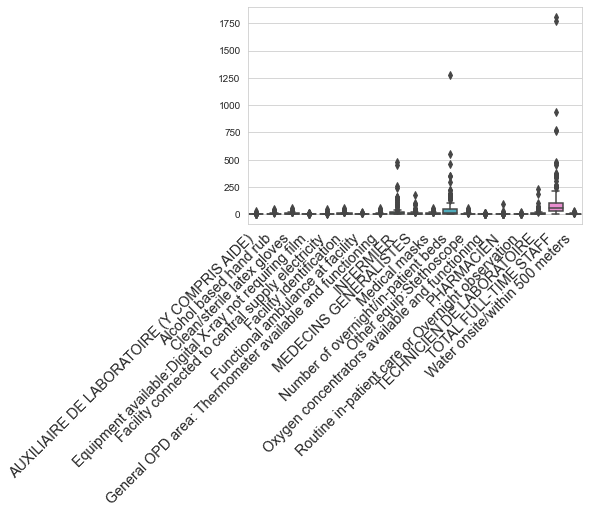

In [206]:
# Create box plots to analyze variation within each variable

boxplots = sns.boxplot( data = analytical_dataset.iloc[:,1:-2])
boxplots = boxplots.set_xticklabels(
    boxplots.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

) 
boxplots

In [257]:
# Calculate summary statistics of metrics in the dataset
# Use this information to understand the distribution and variation within the dataset
analytical_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),155.0,0.967742,3.043877,0.000000,0.000000,0.000000,1.000000,3.100000e+01
Alcohol based hand rub,155.0,5.929032,7.218402,0.000000,2.000000,3.000000,7.000000,4.900000e+01
Clean/sterile latex gloves,155.0,6.496774,8.222059,1.000000,2.000000,4.000000,8.000000,6.000000e+01
Equipment available:Digital X-ray not requiring film,155.0,0.903226,1.982961,0.000000,0.000000,0.000000,1.000000,1.600000e+01
Facility connected to central supply electricity,155.0,2.387097,5.860264,0.000000,0.000000,1.000000,2.000000,4.500000e+01
Facility identification,155.0,6.664516,8.488554,1.000000,2.000000,4.000000,8.000000,6.200000e+01
Functional ambulance at facility,155.0,2.019355,2.748012,0.000000,0.500000,1.000000,3.000000,1.700000e+01
General OPD area: Thermometer available and functioning,155.0,6.264516,7.929951,0.000000,2.000000,4.000000,7.000000,5.700000e+01
INFERMIER,155.0,28.664516,65.347252,0.000000,4.000000,8.000000,17.500000,4.810000e+02
MEDECINS GENERALISTES,155.0,10.116129,20.472647,0.000000,2.000000,4.000000,9.000000,1.750000e+02


#### Visual Analysis
The varying ranges of the variables is making it difficult to compare the amount of variation for each variable. By using a table of summary statistics we can see some variables have a very high standard deviation which may be useful for further investigation

### Population Adjust Metrics
In order to analyze the communes or departments effectively it is necessary to apply an adjustment to metrics calculated to be relative to the local population. We will will convert all the metrics to rates per 100,000 people. 

In [207]:
# Use the population dataset
#Calculate adjusted metric columns by dividing by the population estimate for that commune
# Multiply result by 100k
adataset_per_100k = analytical_dataset.iloc[:,2:analytical_dataset.shape[1]-3]\
    .div(analytical_dataset['IHSI_UNFPA_2019'],axis=0)*100000
adataset_per_100k

,AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),Alcohol based hand rub,Clean/sterile latex gloves,Equipment available:Digital X-ray not requiring film,Facility connected to central supply electricity,Facility identification,Functional ambulance at facility,General OPD area: Thermometer available and functioning,INFERMIER,MEDECINS GENERALISTES,Medical masks,Number of overnight/in-patient beds,Other equip:Stethoscope,Oxygen concentrators available and functioning,PHARMACIEN,Routine in-patient care or Overnight observation,TECHNICIEN DE LABORATOIRE,TOTAL FULL-TIME STAFF,Water onsite/within 500 meters
0,0.000000,13.612221,13.612221,0.000000,0.000000,13.612221,7.778412,11.667618,9.723015,3.889206,13.612221,17.501427,13.612221,0.000000,0.000000,1.944603,1.944603,85.562534,9.723015
1,0.000000,6.837393,6.837393,0.000000,2.279131,6.837393,0.000000,4.558262,4.558262,4.558262,6.837393,22.791309,6.837393,0.000000,0.000000,2.279131,4.558262,61.536535,4.558262
2,0.000000,8.814260,9.742077,0.463908,1.855634,9.742077,1.391725,9.278168,19.484154,3.247359,9.742077,17.164611,9.278168,0.000000,0.000000,0.463908,4.639084,98.348585,8.350352
3,0.000000,9.884980,11.532477,0.000000,1.647497,11.532477,3.294993,11.532477,18.122463,6.589987,11.532477,31.302436,11.532477,1.647497,1.647497,1.647497,16.474967,169.692155,8.237483
4,1.420956,3.315564,3.789216,0.473652,1.657782,3.789216,0.710478,3.315564,30.076900,6.631128,3.789216,53.285847,3.789216,0.473652,1.184130,0.947304,7.341606,111.308214,3.078738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.000000,12.445990,12.445990,0.000000,0.000000,12.445990,0.000000,12.445990,8.297327,4.148663,12.445990,12.445990,12.445990,0.000000,0.000000,0.000000,4.148663,49.783961,8.297327
151,0.377931,7.558628,7.936559,1.133794,3.023451,7.936559,1.889657,7.558628,42.706246,10.582079,7.936559,49.131079,7.936559,2.267588,0.755863,1.133794,7.558628,114.135277,4.535177
152,0.000000,1.942730,1.942730,0.000000,0.000000,1.942730,0.000000,1.942730,0.000000,9.713649,1.942730,27.198218,1.942730,1.942730,0.000000,1.942730,1.942730,38.854597,1.942730
153,1.894726,3.789452,3.789452,0.000000,1.894726,3.789452,2.842089,3.789452,11.368355,8.526266,3.789452,15.157806,3.789452,1.894726,0.000000,0.947363,2.842089,52.104958,1.894726


[Text(0, 0, 'AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE)'),
 Text(0, 0, 'Alcohol based hand rub'),
 Text(0, 0, 'Clean/sterile latex gloves'),
 Text(0, 0, 'Equipment available:Digital X-ray not requiring film'),
 Text(0, 0, 'Facility connected to central supply electricity'),
 Text(0, 0, 'Facility identification'),
 Text(0, 0, 'Functional ambulance at facility'),
 Text(0, 0, 'General OPD area: Thermometer available and functioning'),
 Text(0, 0, 'INFERMIER'),
 Text(0, 0, 'MEDECINS GENERALISTES'),
 Text(0, 0, 'Medical masks'),
 Text(0, 0, 'Number of overnight/in-patient beds'),
 Text(0, 0, 'Other equip:Stethoscope'),
 Text(0, 0, 'Oxygen concentrators available and functioning'),
 Text(0, 0, 'PHARMACIEN'),
 Text(0, 0, 'Routine in-patient care or Overnight observation'),
 Text(0, 0, 'TECHNICIEN DE LABORATOIRE'),
 Text(0, 0, 'TOTAL FULL-TIME STAFF'),
 Text(0, 0, 'Water onsite/within 500 meters')]

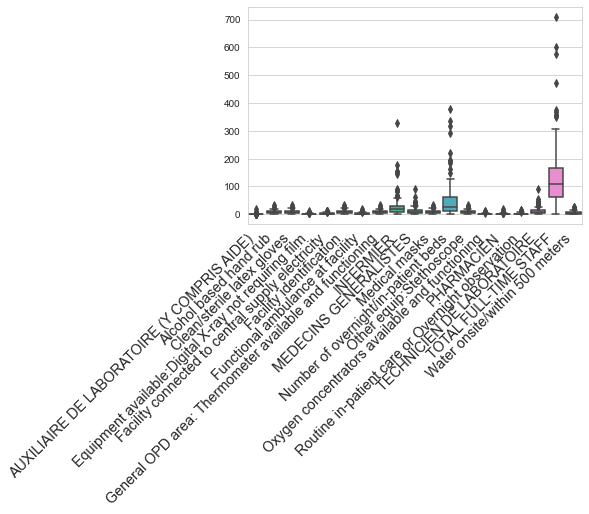

In [208]:
# Create boxplots  
boxplots = sns.boxplot( data = adataset_per_100k)
boxplots = boxplots.set_xticklabels(
    boxplots.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

) 
boxplots

In [259]:
# Calculate summary statistics of metrics in the dataset
# Use this information to understand the distribution and variation within the dataset
adataset_per_100k.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),155.0,0.799523,2.040856,0.000000,0.000000,0.000000,0.617295,18.901098
Alcohol based hand rub,155.0,8.026032,5.787077,0.000000,3.967362,7.301454,10.619763,33.456474
Clean/sterile latex gloves,155.0,8.579136,5.874138,0.081464,4.466792,7.544463,11.417771,33.456474
Equipment available:Digital X-ray not requiring film,155.0,0.858679,1.515778,0.000000,0.000000,0.000000,1.312962,11.152158
Facility connected to central supply electricity,155.0,2.052400,2.717991,0.000000,0.000000,1.395015,3.068584,13.382590
Facility identification,155.0,8.788548,6.131082,0.081464,4.466792,7.588138,11.554030,33.456474
Functional ambulance at facility,155.0,2.812414,3.110736,0.000000,0.161100,2.224656,3.839668,20.518409
General OPD area: Thermometer available and functioning,155.0,8.322372,5.760058,0.000000,4.266133,7.474641,11.088158,33.456474
INFERMIER,155.0,27.207166,37.446418,0.000000,8.824316,18.122463,29.582607,327.897890
MEDECINS GENERALISTES,155.0,11.130039,12.166345,0.000000,3.827659,7.663361,14.313985,89.217265


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x137857e50>,
      dtype=object)

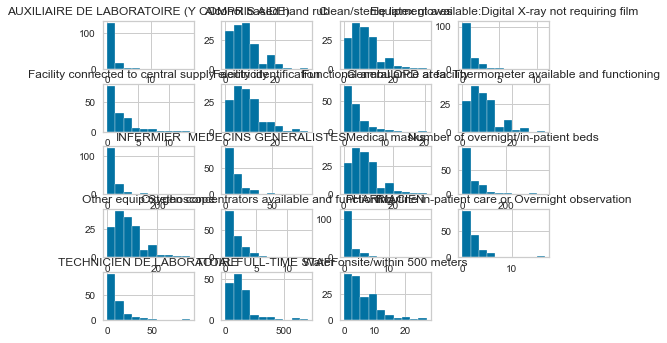

In [253]:
adataset_per_100k.hist()

#### Visual Analysis
Many of the variables seem to be skewed to the right. Based on the shape of histograms, many of the features do not appear to have a normal distribution but instead a log distribution. 

### Log Transformation of the features in the dataset

I apply a log transformation to the variables in the dataset to normalize the distribtions of the metrics for futher analysis.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


[Text(0, 0, 'AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE)'),
 Text(0, 0, 'Alcohol based hand rub'),
 Text(0, 0, 'Clean/sterile latex gloves'),
 Text(0, 0, 'Equipment available:Digital X-ray not requiring film'),
 Text(0, 0, 'Facility connected to central supply electricity'),
 Text(0, 0, 'Facility identification'),
 Text(0, 0, 'Functional ambulance at facility'),
 Text(0, 0, 'General OPD area: Thermometer available and functioning'),
 Text(0, 0, 'INFERMIER'),
 Text(0, 0, 'MEDECINS GENERALISTES'),
 Text(0, 0, 'Medical masks'),
 Text(0, 0, 'Number of overnight/in-patient beds'),
 Text(0, 0, 'Other equip:Stethoscope'),
 Text(0, 0, 'Oxygen concentrators available and functioning'),
 Text(0, 0, 'PHARMACIEN'),
 Text(0, 0, 'Routine in-patient care or Overnight observation'),
 Text(0, 0, 'TECHNICIEN DE LABORATOIRE'),
 Text(0, 0, 'TOTAL FULL-TIME STAFF'),
 Text(0, 0, 'Water onsite/within 500 meters')]

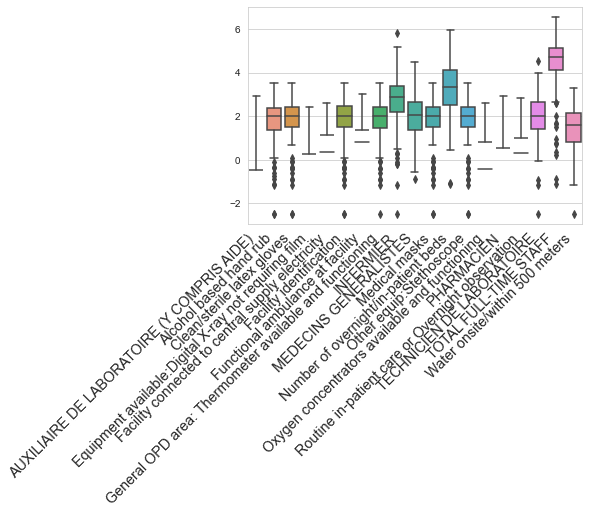

In [210]:
  
boxplots = sns.boxplot( data = np.log(adataset_per_100k))
boxplots = boxplots.set_xticklabels(
    boxplots.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'

) 
boxplots

In [261]:
# Calculate summary statistics of metrics in the dataset
# Use this information to understand the distribution and variation within the dataset
np.log((adataset_per_100k+0.01)).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),155.0,-3.107709,2.431231,-4.605170,-4.605170,-4.605170,-0.466339,2.939749
Alcohol based hand rub,155.0,1.657769,1.313309,-4.605170,1.380619,1.989442,2.363657,3.510544
Clean/sterile latex gloves,155.0,1.836872,0.975185,-2.391813,1.498898,2.022139,2.435996,3.510544
Equipment available:Digital X-ray not requiring film,155.0,-2.530181,2.556398,-4.605170,-4.605170,-4.605170,0.279847,2.412529
Facility connected to central supply electricity,155.0,-1.319386,2.812690,-4.605170,-4.605170,0.340048,1.124362,2.594702
Facility identification,155.0,1.852531,0.985713,-2.391813,1.498898,2.027903,2.447898,3.510544
Functional ambulance at facility,155.0,-0.378578,2.551469,-4.605170,-2.853596,0.804087,1.347985,3.021810
General OPD area: Thermometer available and functioning,155.0,1.764363,1.153919,-4.605170,1.453045,2.012853,2.406778,3.510544
INFERMIER,155.0,2.535134,1.752146,-4.605170,2.178358,2.897704,3.387525,5.792733
MEDECINS GENERALISTES,155.0,1.599298,1.951123,-4.605170,1.344734,2.037755,2.661902,4.491187


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1378cc910>,
      dtype=object)

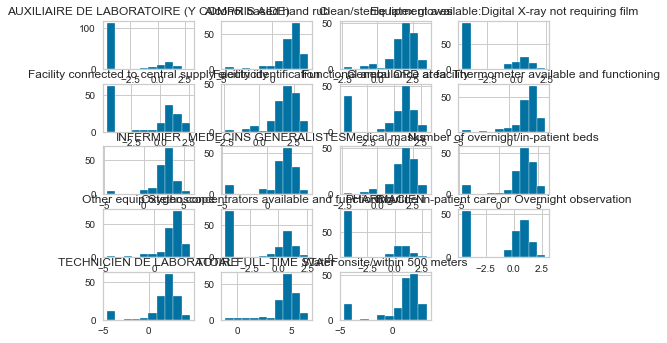

In [252]:
np.log((adataset_per_100k+0.01)).hist()

#### Visual Analysis
By inspecting the box plots we can now see further variataion within each metric. The histogram shapes more closely match a normal distribution which was the intended affect of the log transformation. 

### Correlations or relationships between the analytical variables

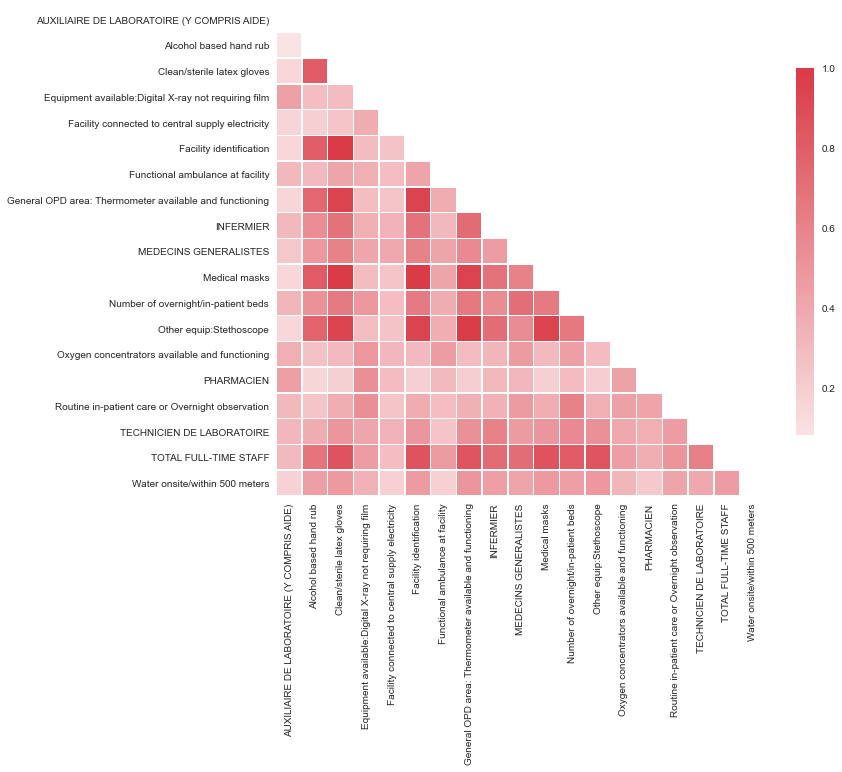

In [255]:
import matplotlib.pyplot as plt

# Compute the correlation matrix
# log transform metrics for analysis
corr = np.log(adataset_per_100k+0.01).corr()



# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

##### Vizualization Analysis
Looking at the dataset we see there are a few variables that are highly correlated include: Total Full-Time Staff and basic medical equipment like masks, thermometers and stethoscopes, this would match our understanding. Areas with higher numbers of facilities are more likely to have higher performance in the core medical equipment necessary.

###  Create a ranked model based on the different capacity areas
    - uniform weights
    - subjective weights
    - propensity score
 - Evaluation of score to match health outcomes data by region, do the areas that we identify as being the most vulnerable in terms of health system capacity also have the worst health outcomes?

### Normalized Capacity Scores 

Normalize all the scores of the individual variables so they are between 0 and 1. This will help in the creation of an index sccore. By normalizing each variable we can then assign selective or uniform weights to each metric to create a new index of performance.

In [228]:
from sklearn import preprocessing

# I could do a log transformation here
normalized_values = preprocessing.minmax_scale(adataset_per_100k, feature_range=(0, 1), axis=0, copy=True)
print(len(normalized_values))

normalized_df = pd.DataFrame(normalized_values)
normalized_df.columns = adataset_per_100k.columns.values
#normalized_df

155


,AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),Alcohol based hand rub,Clean/sterile latex gloves,Equipment available:Digital X-ray not requiring film,Facility connected to central supply electricity,Facility identification,Functional ambulance at facility,General OPD area: Thermometer available and functioning,INFERMIER,MEDECINS GENERALISTES,Medical masks,Number of overnight/in-patient beds,Other equip:Stethoscope,Oxygen concentrators available and functioning,PHARMACIEN,Routine in-patient care or Overnight observation,TECHNICIEN DE LABORATOIRE,TOTAL FULL-TIME STAFF,Water onsite/within 500 meters
0,0.000000,0.406864,0.405416,0.000000,0.000000,0.405416,0.379094,0.348740,0.029653,0.043593,0.405416,0.046430,0.406864,0.000000,0.000000,0.116150,0.021265,0.120031,0.361356
1,0.000000,0.204367,0.202425,0.000000,0.170306,0.202425,0.000000,0.136245,0.013901,0.051092,0.202425,0.060464,0.204367,0.000000,0.000000,0.136131,0.049846,0.086198,0.169408
2,0.000000,0.263455,0.289456,0.041598,0.138660,0.289456,0.067828,0.277321,0.059421,0.036398,0.289456,0.045536,0.277321,0.000000,0.000000,0.027709,0.050729,0.138037,0.310341
3,0.000000,0.295458,0.343101,0.000000,0.123107,0.343101,0.160587,0.344701,0.055269,0.073864,0.343101,0.083043,0.344701,0.122459,0.088971,0.098404,0.180157,0.238504,0.306146
4,0.075178,0.099101,0.111094,0.042472,0.123876,0.111094,0.034626,0.099101,0.091726,0.074326,0.111094,0.141363,0.113258,0.035207,0.063947,0.056582,0.080282,0.156287,0.114421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.000000,0.372005,0.370473,0.000000,0.000000,0.370473,0.000000,0.372005,0.025305,0.046501,0.370473,0.033018,0.372005,0.000000,0.000000,0.000000,0.045367,0.069648,0.308370
151,0.019995,0.225924,0.235359,0.101666,0.225924,0.235359,0.092096,0.225924,0.130243,0.118610,0.235359,0.130341,0.237220,0.168550,0.040819,0.067721,0.082655,0.160268,0.168550
152,0.000000,0.058067,0.055768,0.000000,0.000000,0.055768,0.000000,0.058067,0.000000,0.108876,0.055768,0.072155,0.058067,0.144403,0.000000,0.116038,0.021244,0.054257,0.072202
153,0.100244,0.113265,0.111101,0.000000,0.141581,0.111101,0.138514,0.113265,0.034670,0.095567,0.111101,0.040212,0.113265,0.140835,0.000000,0.056585,0.031079,0.072916,0.070418


### Normalized-Average score (Uniform Score Ranking)
This score uses the normalized values of the columns and then applies a blanket average across all the columns and sums up the results into a single score.

In [229]:
print("Each column will be given the weight of {:.2f}%".format(1/adataset_per_100k.shape[1]))
uniform_score = (normalized_df*(1/adataset_per_100k.shape[1])).sum(axis=1)
uniform_score

Each column will be given the weight of 0.05%


0      0.184015
1      0.099452
2      0.136985
3      0.186562
4      0.091318
         ...   
150    0.145034
151    0.152768
152    0.048983
153    0.083985
154    0.182546
Length: 155, dtype: float64

### Select Score
I created a ranking based on the groupings of themetric, I apply even weight to each variables in the categories.

Health System Capacity 40%
- Number of facitilies  14.29%
- Number of generalists, full-time  14.29%
- Number of lab assistants, full-time 14.29%
- Number of lab technicians, full-time 14.29%
- Number of nurses, full-time 14.29%
- Number of pharmacist, full-time 14.29%
- Total full-time staff 14.29%


Diagnostic Capacity	20%
- Stethoscope*	33.33%
- Thermometer*	33.33%
- X ray machine*	33.33%


Infection Prevention	20%
- Improved water source	33.33%
- Regular electricity 	33.33%
- Soap and running water or else alcohol-based hand disinfectant*	33.33%

Personal Protective Equipment	10%
- Latex Gloves	50.00%
- Medical Masks	50.00%

Theraputic Readiness	10.00%
- Inpatient care	25.00%
- Number of hospital beds	25.00%
- Oxygen-filled oxygen cylinders*	25.00%
- Referral capacity-functional ambulance at facility*	25.00%

In [230]:
select_capacity_score = (normalized_df.loc[:,['Facility identification',
                             'PHARMACIEN',
                             'TOTAL FULL-TIME STAFF',
                             'TECHNICIEN DE LABORATOIRE',
                             'INFERMIER',
                             'MEDECINS GENERALISTES',
                             'AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE)']]*0.1429).sum(axis=1)

select_diagnostic_score = (normalized_df.loc[:,['Other equip:Stethoscope',
                                                'Equipment available:Digital X-ray not requiring film',
                                                'General OPD area: Thermometer available and functioning']]*0.333).sum(axis=1)

select_water_score = (normalized_df.loc[:,['Water onsite/within 500 meters',
                                          'Facility connected to central supply electricity',
                                          'Alcohol based hand rub']]*0.333).sum(axis=1)

select_ppe_score = (normalized_df.loc[:,['Clean/sterile latex gloves','Medical masks']]*0.50).sum(axis=1)

select_therapy_score = (normalized_df.loc[:,['Functional ambulance at facility',
                                            'Oxygen concentrators available and functioning',
                                            'Number of overnight/in-patient beds',
                                            'Routine in-patient care or Overnight observation']]*0.25).sum(axis=1)


select_score = select_capacity_score*.40\
+ select_diagnostic_score*.20\
+ select_water_score *.20\
+ select_ppe_score * .10\
+ select_therapy_score *.10



### Save results into a final dataframe for inspection and further analysis

In [233]:
# Save the results of the two scoring methods in a new dataframe
scored_df = adataset_per_100k.copy()
scored_df = scored_df.join(analytical_dataset.loc[:,['adm1_fr',"adm2_en"]])
scored_df['uniform_score'] =uniform_score
scored_df['uniform_rank'] = scored_df['uniform_score'].rank(axis=0,method='min')
scored_df['select_score'] = select_score
scored_df['select_rank'] = scored_df['select_score'].rank(axis=0,method='min')

scored_df

,AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),Alcohol based hand rub,Clean/sterile latex gloves,Equipment available:Digital X-ray not requiring film,Facility connected to central supply electricity,Facility identification,Functional ambulance at facility,General OPD area: Thermometer available and functioning,INFERMIER,MEDECINS GENERALISTES,...,Routine in-patient care or Overnight observation,TECHNICIEN DE LABORATOIRE,TOTAL FULL-TIME STAFF,Water onsite/within 500 meters,adm1_fr,adm2_en,uniform_score,uniform_rank,select_score,select_rank
0,0.000000,13.612221,13.612221,0.000000,0.000000,13.612221,7.778412,11.667618,9.723015,3.889206,...,1.944603,1.944603,85.562534,9.723015,Artibonite,Anse Rouge,0.184015,105.0,0.191007,104.0
1,0.000000,6.837393,6.837393,0.000000,2.279131,6.837393,0.000000,4.558262,4.558262,4.558262,...,2.279131,4.558262,61.536535,4.558262,Artibonite,Desdunes,0.099452,49.0,0.107140,51.0
2,0.000000,8.814260,9.742077,0.463908,1.855634,9.742077,1.391725,9.278168,19.484154,3.247359,...,0.463908,4.639084,98.348585,8.350352,Artibonite,Dessalines,0.136985,77.0,0.152444,88.0
3,0.000000,9.884980,11.532477,0.000000,1.647497,11.532477,3.294993,11.532477,18.122463,6.589987,...,1.647497,16.474967,169.692155,8.237483,Artibonite,Ennery,0.186562,107.0,0.196112,106.0
4,1.420956,3.315564,3.789216,0.473652,1.657782,3.789216,0.710478,3.315564,30.076900,6.631128,...,0.947304,7.341606,111.308214,3.078738,Artibonite,Gonaives,0.091318,42.0,0.094563,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.000000,12.445990,12.445990,0.000000,0.000000,12.445990,0.000000,12.445990,8.297327,4.148663,...,0.000000,4.148663,49.783961,8.297327,Sud-Est,Grand Gosier,0.145034,85.0,0.164592,92.0
151,0.377931,7.558628,7.936559,1.133794,3.023451,7.936559,1.889657,7.558628,42.706246,10.582079,...,1.133794,7.558628,114.135277,4.535177,Sud-Est,Jacmel,0.152768,90.0,0.158978,90.0
152,0.000000,1.942730,1.942730,0.000000,0.000000,1.942730,0.000000,1.942730,0.000000,9.713649,...,1.942730,1.942730,38.854597,1.942730,Sud-Est,La Vallee,0.048983,17.0,0.044029,15.0
153,1.894726,3.789452,3.789452,0.000000,1.894726,3.789452,2.842089,3.789452,11.368355,8.526266,...,0.947363,2.842089,52.104958,1.894726,Sud-Est,Marigot,0.083985,37.0,0.082732,32.0


## Identify clusters within the dataset
- Use K-Elbow plot to identify optimal number of clusters
- Run K-Mean clustering algorithm to identify nearest nehbots

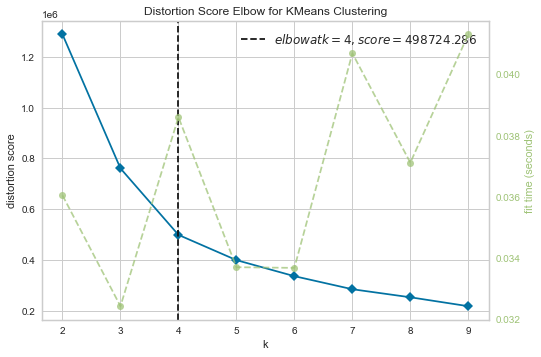

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x13124ae10>,
                 k=None, model=None)

In [235]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer


# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), adataset_per_100k, k=(2,10))

In [236]:
# create kmeans object
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data
kmeans.fit(adataset_per_100k)
# print location of clusters learned by kmeans object
#print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(adataset_per_100k)

scored_df['cluster'] = y_km
scored_df

,AUXILIAIRE DE LABORATOIRE (Y COMPRIS AIDE),Alcohol based hand rub,Clean/sterile latex gloves,Equipment available:Digital X-ray not requiring film,Facility connected to central supply electricity,Facility identification,Functional ambulance at facility,General OPD area: Thermometer available and functioning,INFERMIER,MEDECINS GENERALISTES,...,TECHNICIEN DE LABORATOIRE,TOTAL FULL-TIME STAFF,Water onsite/within 500 meters,adm1_fr,adm2_en,uniform_score,uniform_rank,select_score,select_rank,cluster
0,0.000000,13.612221,13.612221,0.000000,0.000000,13.612221,7.778412,11.667618,9.723015,3.889206,...,1.944603,85.562534,9.723015,Artibonite,Anse Rouge,0.184015,105.0,0.191007,104.0,1
1,0.000000,6.837393,6.837393,0.000000,2.279131,6.837393,0.000000,4.558262,4.558262,4.558262,...,4.558262,61.536535,4.558262,Artibonite,Desdunes,0.099452,49.0,0.107140,51.0,1
2,0.000000,8.814260,9.742077,0.463908,1.855634,9.742077,1.391725,9.278168,19.484154,3.247359,...,4.639084,98.348585,8.350352,Artibonite,Dessalines,0.136985,77.0,0.152444,88.0,1
3,0.000000,9.884980,11.532477,0.000000,1.647497,11.532477,3.294993,11.532477,18.122463,6.589987,...,16.474967,169.692155,8.237483,Artibonite,Ennery,0.186562,107.0,0.196112,106.0,3
4,1.420956,3.315564,3.789216,0.473652,1.657782,3.789216,0.710478,3.315564,30.076900,6.631128,...,7.341606,111.308214,3.078738,Artibonite,Gonaives,0.091318,42.0,0.094563,42.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.000000,12.445990,12.445990,0.000000,0.000000,12.445990,0.000000,12.445990,8.297327,4.148663,...,4.148663,49.783961,8.297327,Sud-Est,Grand Gosier,0.145034,85.0,0.164592,92.0,1
151,0.377931,7.558628,7.936559,1.133794,3.023451,7.936559,1.889657,7.558628,42.706246,10.582079,...,7.558628,114.135277,4.535177,Sud-Est,Jacmel,0.152768,90.0,0.158978,90.0,3
152,0.000000,1.942730,1.942730,0.000000,0.000000,1.942730,0.000000,1.942730,0.000000,9.713649,...,1.942730,38.854597,1.942730,Sud-Est,La Vallee,0.048983,17.0,0.044029,15.0,1
153,1.894726,3.789452,3.789452,0.000000,1.894726,3.789452,2.842089,3.789452,11.368355,8.526266,...,2.842089,52.104958,1.894726,Sud-Est,Marigot,0.083985,37.0,0.082732,32.0,1


In [246]:
# Save cluster results output to scored_df and export for further analysis in excel
scored_df.groupby("cluster").describe().transpose().to_excel("Scored Dataframe.xlsx")

In [238]:
# cluster_colors = {0:"red",1:"blue",2:"green"}
# scored_df['cluster_cols'] = scored_df.cluster.map(cluster_colors)

#scored_df.plot(x='select_score',y='uniform_score',colormap='cluster_cols')
ax = sns.scatterplot(x='Facility identification', y='MEDECINS GENERALISTES', hue="cluster",
                     data=scored_df)
